# Di-lepton mass spectrum from the Compact Muon Solenoid

In this project, you will analayze *real* data collected by the Compact Muon Solenoid (CMS) at the Large Hadron Collider (LHC) to "discover" several unstable particles.  This notebook describes the background and steps you will take to mimic (in spirit) several Nobel Prize-winning analyses*... all from the comfort of your keyboard.

*Ok, you won't be designing or building the detectors, merely analyzing the high-level data.

This document is divided into several sections:

1. **Physics background.** 
    - What is HEP? 
    - How do we study the fundamental interactions? 
    - Relativistic kinematics and conservation laws 
    - What are the LHC and CMS, and roughly how do they work?
    - Other resources
1. **Programming recap**. 
    - Histogramming and fitting, a refresher
1. **Analysis**
    - Di-electron dataset
    - Di-muon dataset

The first four sections explain the necessary physics background and provide resources for further reading.  The last two sections walk you through the analysis of two datasets.  You will use numerical results and plots generated in the last two sections to produce an overview of your analysis.

## Physics background

### What is HEP?

**High-energy physics (HEP)** is the field of physics that studies the fundamental forces at play in our universe.  "Fundamental" refers to the *reductionist* perspective of understanding complex systems in terms of their constituent parts.  

For example, if you consider your own study of physics, you began with interactions between macroscopic objects.  Let's say you want to understand how the Golden Gate Bridge works.  Yikes, it's a complicated thing composed of many girders, cables, *etc.*  So, what we do is consider its constituent parts, say individual interactions between chunks of the structure that are connected by steel cables.  We assume that if we can understand the properties of all of the chunks that make up the bridge, we can understand the properties of the bridge as a whole.  

For each chunk we investigate the tension forces applied by the steel cables connected to it.  Intro Physics I, you were given a macroscopic model of how a rope applies tension forces to the objects (*i.e.*, along the direction of the cable, characterized by uniform tension).  

Then, in Intro Physics II you became more sophisticated and learned that the rope is made of atoms, and the atoms are held together by electromagnetic forces.  The reductionist approach assumes that if we understand the the behavior/properties of the microscopic atoms that compose the cable, we can predict the properties of the macroscopic cable.

If you've taken a course in Modern Physics (intro quantum mechanics), you've probably learned that the cable's atoms are composed of smaller particles, namely electrons, protons, and neutrons.  The reductionst approach assumes that if we understand the properties of the sub-atomic particles, we can in principle predict the properties of the atoms in the cable (and thus the behavior of the cable [and thus the properties of the bridge]).

It should be noted that this is not how most bridge engineers go about their business -- they don't start with the Schr&ouml;dinger equation when designing their bridges.  However, there are systems for which we **need** to understand the large-scale properties of the system (more on this later).

**High-energy Physics** is what we get when we take the reductionist perspective to its limit.  HEP studies the smallest constituents of matter, "particles", that make up our universe.  These particles are fundamental in the sense that they have no sub-structure.  We know that bridges, cables, and atoms are not fundamental particles because they are composed of smaller entities.  To the contrary, we currently believe that electrons (for example) are fundamental particles because we have no evidence that they are composed of smaller entities!  For this reason, we sometimes refer to HEP as "particle physics".

So, high-energy physicists study (*i.e.*, try to determine the properties of) the smallest bits of matter.  A vital part of what we mean by "properties" is the ways in which these particles interact with one another.  At present, we know of only four types of interactions that can happen between fundamental particles, which we give the following names:
- Electromagnetic interaction
- Strong interaction 
- Weak interaction
- Gravitational interaction
You can think of these as the "rules" by which the particles interact.  

The first three of these are fairly well understood in the realm of HEP; the fourth (which is possibly the first interaction you studied in PHY 107) is not.  Weird.

If the reductionist approach holds, we should be able to understand the large-scale behavior/properties of the Universe (capital U) from the properties of the fundamental particles.  The history and large-scale structure of our Universe turns out to depend meaningfully on these fundamental interactions!  While a bridge engineer can ignore the Strong interaction, a cosmologist cannot!

**The Standard Model** (SM) of Particle Physics is the framework by which we currently understand these fundamental interactions.  The SM describes (mathematically) the ways in which the fundamental particles interact.  It allows us (well, theorists) to predict what will happen when two or more fundamental particles interact, and we (well, HEP experimenters) can then measure those interaction in the laboratory to see if the predictions are correct.  The SM is an insanely successful scientific theory.  Many aspects of it have been tested in the laboratory tens of thousands of times.  It has been used to predict the existence of new particles that were then discovered in the laboratory.  Its predictions have been confirmed by experiments to precision of parts per trillion!  And yet, we know it's wrong or at least incomplete. 

The SM and our current understanding of HEP is provisional!  That is, the particles in the SM are those for which we don't have any evidence of sub-structure.

#### Before moving on

1. Use materials linked in the "Other Resources" section below to make a spreadsheet containing *all* of the fundamental particles.  The first column should be particle names/symbols and each row should be a single particle for a total of 17 data rows.  Organize the rows so that leptons come first, quarks come second, and gauge bosons come third.  You do not need to include antiparticles.
1. Add columns to the spreadsheet that give the particles' masses, electric charges, and spins.  (Recall that spin is a type of angular momentum that is intrinsic to each particle type.)
1. Add a column that lists the interactions that each particle participates in.
1. Add a column that lists each particle's antiparticle.  (Some particles may be their own antiparticles!)
1. Add a column that lists when each of the particles was first discovered/observed in experiments.
1. Find definitions for the following terms: hadrons, mesons, baryons.
1. We sometimes divide the fundamental particles into two broad groups: the fermions and the (gauge) bosons.  What are the differences between these two groups?
1. Roughly how many mesons are listed in the PDG (see "Other resources" below)?

### How do we study the fundamental interactions?

Studying fundamental particles and their interactions is complicated by two main issues:
1. **Instability**: Of the SM particles that you entered into your table, only a handful are stable on the order of seconds or longer: electrons, neutrinos, possibly $u$ and $d$ quarks (when they are bound into protons or neutrons).  Once created, the other particles may only live for fractions of a second -- lifetimes range between $10^{-23}$ and $10^{-8}$ seconds.  So, even forming a sample of these particles to study is incredibly difficult -- one can't just go to WalMart and get a bag of Great Value-brand Tau Leptons.  The short lifetimes also mean that these particles do not travel very far before decaying. 
1. **Dimension**: Their dimensions (if any) make these particles wayyyyyy to small to "see" by normal methods.  At present, physicists have determined that particles of the SM have no sub-structure down to a scale of about $10^{-19}$ m.  Keeping in mind that visible light has a wavelength approximately $10^{12}$ times larger than this, we have no hope of "imaging" these particles in the same way that we would macroscopic objects or even molecular or crystalline structure.

Experimental HEP research can be thought to happen in three phases:

#### I. Production

We must first produce the particles that we want to study.  This is typically done by colliding high-energy stable or stable-ish particles (electrons, protons, neutrons, neutrinos, or some rarer options) into matter.  Quantum Mechanics and Special Relativity allow for these collisions (if energetic enough) to produce new short-lived particles or bound-states of particles.  For more on this, please watch [this short video](https://www.youtube.com/watch?v=so2nCu2Jkbc&ab_channel=CERN).  This can be done in a laboratory with a particle accelerator that can be designed/tuned for a given experimental set-up, or, less commonly, using high-energy cosmic rays or particles that are produced by nuclear reactors.

It should be mentioned that one doesn't simply decide to do this and then walk into the lab and do it!  Particle accelerators and collider experiments require lots of time (decades), money (tens of millions to billions of dollars), and people (thousands per experiment) to design, construct, and calibrate.

In this module, you'll analyze data from collision events that were produced by the Large Hadron Collider at CERN in 2010.  The LHC accelerates two beams of protons in opposite directions around a roughly circular accelerator.  The beams are made to cross one another in several experimental halls, causing protons in the beams to collide.

#### II. Detection

The particles or bound states produced in a collision then decay into stable or stable-ish particles that we can observe.  Only a small number of particles live long enough for us to register them with a detector: electrons, muons, protons, neutrons, pions, kaons, neutrinos (but difficult to detect).  Notice that I've been very careful to not say "detect directly" -- these things are too small to see, and we have to rely on their effect on the materials that make up our detector to intuit their presence.

For more on this, please watch [this short video](https://www.youtube.com/watch?v=pW4LTunlXS4&ab_channel=CERN).

Detectors come in two main varieties (with a few smaller categories that we won't discuss).  First, there are spectrometers which measure the bending of a charged particle's trajectory as it passes through a magnetic field.  You may recall from E&M that the direction of curvature depends on the direction of the magnetic field ($\vec{B}$) and the charge of the particle ($q$). Furthermore, the radius of curvature of the track depends on the magnetic field magnitude, the charge of the particle, and the *momentum* of the particle ($p$).  Most large particle detectors have a magnetic field and "tracking" detectors that observe particles' trajectories as they pass through the field. If you've ever used a mass spectrometer in a chemistry course, precisely the same principle is at play here.

Second, there are calorimeters which measure the energy that a particle deposits in a detector as the particle crashes into the material that composes the detector.  Calorimeters typically combine a dense material such as lead with a scintillating material.  When a high-energy proton (say) passes through the lead, it produces photons and charged particles (sometimes called a "shower" of particles).  These particles then pass into the scintillator, which "scintillates" (produces light) proportional to the energies of the particles that pass through it.  The scintillation light is collected and modeling allows physicists to determine the energy of the initial particle.

Individual detector components measure so-called low-level signals: voltages and currents.  Through a complicated algorithmic process, these low-level signals are processed to tell us the momenta and energies of particles' tracks.  Designing and understanding a detector that can do this is an *enormous* undertaking, and, like accelerators, modern particle detectors are overwhelmingly complicated (see resources below).  You will be analyzing data collected by the Compact Muon Solenoid detector at CERN.

We'll see below that determining the charge, energy, and momentum of a particle allows us to determine what type of particle it is, even though we never directly observe it!

#### III. Analysis

The final(-ish) stage of a HEP experiment is analysis, in which physicists take the energies and momenta of detected particles and apply physics to investigate the properties of the short-lived particles and their interactions at the time of production.  
Though the operations of accelerators and detectors are very complicated, the basic tools of the analysis stage are pretty simple: conservation of energy, momentum, and charge.  (Notice that mass is not on this list!)

For more information, please watch [this short video](https://www.youtube.com/watch?v=8-WFBGCvv-w&ab_channel=CERN).

HEP is a field driven by high statistics.  The resources linked below can give you some idea of how much data a modern HEP experiment produces. (CMS has an event rate of about 40 MHz -- 40 million proton-proton collisions per second!)  Analysis must be done by computers.  SURPRISE!  That's why we're in a Jupyter notebook :^)

The analysis stage constitutes only a small fraction of the effort that goes into doing particle physics.  Very few accelerators and detectors are build with a single analysis or result in mind; that is, most experimental apparatus are intended to be as general-purpose as possible.  If these experiments are well designed and built successfully, they will allow for decades worth of analyses and results.

#### What are we doing here?

In this module, you will analyze data from events produced by the LHC, detected by CMS, and pre-analyzed so that the datafiles contain only events with $e^-,e^+$ or $\mu^-,\mu^+$ pairs.  You will perform an analysis to determine what more massive particles the lepton/anti-lepton pairs may have decayed from, and to determine the properties of these parent particles.


### Relativistic kinematics and conservation laws

In the previous section, we discussed how detectors tell us the charge, energy, and momentum of the particles that pass through it.  In almost all cases, these particles are *relativistic* -- their speeds are close enough to $c$ that we need to take into account relativistic effects!
(One way to think about the term "HEP" is that the detected particles have high energy compared to their rest-mass energy.)

Any modern physics textbook (see "Other resources" below) will have a chapter on relativistic energy and momentum; here we review the basics that you'll need to do the analysis below.  Recall that for a particle with rest mass $m$ and velocity $\vec{u}$, relativistic energy and momentum are given by 

\begin{align}
  \vec{p} &= \gamma m \vec{u} = \gamma m (u_x \hat{\imath} + u_y \hat{\jmath} + u_z \hat{k}) \\
  E &= \gamma m c^2
\end{align}

where $\gamma = \left(1 - u^2/c^2\right)^{-\frac{1}{2}}$ is commonly called the Lorentz factor.  

The detector might also measure the speed of the particle by considering its path through the detector and the time it takes to traverse this path.  

For a free particle (one traveling in the absence of a potential) the total energy is composed of the kinetic and rest-mass energy terms: 

\begin{equation}
  E^2 = p^2c^2 + m^2 c^4.
\end{equation}

We can rearrange this equation to yield:

\begin{equation}
  m = \frac{1}{c^2}\sqrt{E^2 - p^2 c^2}.
\end{equation}

So if the detector measures the energy and momentum associated with a track, we can extract the mass of the particle that created the track.  Considering this mass and the charge (from the direction of the track's curvature), we can identify the particle.
As mentioned above, you'll be working with two datasets: one with electron/positron pairs, and one with muon/anti-muon pairs.

Though relativistic energy and momentum differ from their classical forms, these quantities still appear in conservation equations (independently).  Consider a process in which an unstable initial-state particle ($P$) decays into two particles $\ell_1$ and $\ell_2$.  We write this decay reaction as $P \rightarrow \ell_1 \ell_2$.
Conservation of energy forces the initial- and final-state energies to be equal,

\begin{equation}
  E_{i} = E_{1} + E_{2} \implies E_{i}^2 = E_{1}^{2} + E_{2}^{2} + 2 E_{1}E_{2}
\end{equation}

and conservation of momentum foces the initial- and final-state momenta to be equal,

\begin{equation}
  \vec{p}_{i} = \vec{p}_{1} + \vec{p}_{2} \implies p_{i}^{2} = p_{iz}^{2} +p_{iy}^{2} +p_{iz}^{2} = p_{1}^{2} + p_{2}^{2} + 2\vec{p}_{1}\cdot \vec{p}_{2}.
\end{equation}

Combining all of this, we can write the mass of the parent particle as 

\begin{equation}
  m_P = \frac{1}{c^2}\sqrt{E_{i}^{2} - p_{i}^{2}c^2} = \; ... \; = \frac{1}{c^2} \sqrt{E_{i}^{2} - c^2 \left( p_{ix}^{2} + p_{iy}^{2} + {p}_{iz}^{2}\right)}
\end{equation}

This expression is sometimes referred to as the *invariant mass* of particles 1 and 2.
If you're interested in a more compact way to write all of this, you can read up on 4-vectors in any modern physics textbook.

The last of these equations is what you will apply to your di-lepton datasets.  For each lepton/anti-lepton pair, you will calculate the invariant mass to see if it correlates with the mass of a known particle or bound state.

### Units

You'll recall that the relativistic energy equation above can be interpreted as an equivalence between mass and energy, with some pesky factors of $c$ in some terms.  High-energy physicists often use units of GeV for energy (that's normal), GeV/$c$ for momentum (less normal), and GeV/$c^2$ for mass (that's weird).  The advantage of doing so allows us to work in a system of units where $c = 1$ and the equations above simplify immensely.  The dataset that you'll work with below uses these units.

### Before moving on

Again, you may notice that the invariant mass of the parent particle **does NOT** obey a relationship like $m_i= m_1 + m_2$.  Why is this?

### Discrete conservation laws

In addition to conservation of energy and momentum -- which we sometimes call conitnuous conservation laws because these quantities can take a continuum of values -- there are several other *discrete* conservation laws.  Those relevant for your analysis are:
- Conservation of electric charge.  If each particle in the decay has electric charge ($q$), then $q_i = q_1 + q_2$.
- Conservation of angular momentum.  This is a bit more complicated, and unless you have taken an advanced course in QM addition of angular momentum will be a bit beyond the scope of this module.  For the time being, it is enough to recall that electrons and muons are spin-1/2 particles.  These spins (and the orbital angular momentum of the two leptons) must add to give the spin of the parent particle.  The parent particle must have whole-integer spin; *i.e.*, it must be a spin-0, spin-1, ... particle.

### What is the LHC?  CMS?

The people that work on the LHC and its experiments produce amazing literature and explainers aimed at non-experts.  For information on CMS the [main CERN/CMS website](https://cms.cern/detector) is excellent.  Click and read through all four subsections of "How CMS Works".

The LHC is just as important as the detectors in making discoveries... and [its website](https://home.cern/science/accelerators/large-hadron-collider) is just as cool and informative.

There are also many, many, many excellent videos about how these machines work and what they do.  Give the following a quick view:
- [CMS Experiment -- An Introduction to the CMS Experiment at CERN](https://www.youtube.com/watch?v=S99d9BQmGB0&ab_channel=CMSExperiment)
- [CERN -- CMS prepares for HL-LHC](https://www.youtube.com/watch?v=q2rQbtkzkMs&ab_channel=CERN)
- [Sixty Symbols -- Inside the LHC (CMS)](https://www.youtube.com/watch?v=5r6vyZ2bykg&ab_channel=SixtySymbols)
- [Sixty Symbols -- Working at CERN](https://www.youtube.com/watch?v=-0SKDXwHKkA&ab_channel=SixtySymbols)
- [Sixty Symbols -- Petabytes of Data at the LHC](https://www.youtube.com/watch?v=0mgXNgD3JFU&ab_channel=SixtySymbols)
- [CERN -- The Higgs Discovery Explained: Produce](https://www.youtube.com/watch?v=so2nCu2Jkbc&ab_channel=CERN).  See physicists freaking flip out at 0:47.  Excellent series, love how it's broken into Produce, Detect, Analyze segments!

### Other resources

#### Relativistic mechanics
For more information on relativistic kinematics, especially 4-vectors and conservation of energy/momentum, see
- Harris, *Modern Physics* (2e).  Chapter 2
- Taylor, *Modern Physics for Scientists and Engineers* (2e). Chapters 1, 2

#### Fundamental particles and interactions: Concepts
There are many great resources on these topics, at many different levels of sophistication.  The first place to start is the particle physics chapters of introductory and intermediate-level textbooks.  These give a conceptual overview of the topics above.  I recommend:
- Giancoli, *Physics for Scientists & Engineers* (7e).  Chapters 41, 43, and 44
- Harris, *Modern Physics* (2e).  Chapters 11, 12
- Taylor, *Modern Physics for Scientists and Engineers* (2e). Chapters 16, 18

#### Particle properties: Pro-level info
[The Review of Particle Physics](https://pdg.lbl.gov/) is an annual publication that compiles essentially everything that is known about anything related to particle physics.  (It is sometimes referred to as "The PDG", short for Particle Data Group, after the organization that publishes it.)  The last time the PDG was printed, it was roughly 2000 pages -- in recent years, it has gone completely online!  In addition to information about particles, the PDG has some great review-style articles (under "Reviews, Tables, Plots") about things related to particle physics: how accelerators work, cosmology, different types of detectors, probability and statistics, hypothetical particles and concepts, *etc.*  

In order to find information in the PDG, one has to know something about the particle that one is looking for.  If you navigate to the [Interactive Listings](https://pdglive.lbl.gov/Viewer.action), you'll see particles characterized by type.  Click on one of these, perhaps your old pal the electron, and you'll see the particle's properties (with experimental uncertainties) and you can click a drop-down to get the experiments that these values are based on.  Very cool.

Two PDG reviews may be of use to you: 
- Experimental Methods and Colliders --> Particle detectors at accelerators
- Kinematics, Cross-section Formulae, and Plots --> Kinematics



## Programming recap

### Histogramming and fitting, a refresher

In this module, you'll analyze two datasets with a combined $2\times 10^5$ events.  You're not going to do so with pen and paper, and you're certainly not going to do so with Excel.  So, dust off your old Python skills!  Let's recall how to histogram and fit to data using a file containing fake data (`testdata.asci`).  First we'll import some libraries and read in our data file line-by-line (which has two columns).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

val1, val2 = [], []

f = open('data_files/testdata.ascii', 'r')
lin = f.readline() # read off the header line
lin = f.readline()
while len(lin) > 1:
    arr = lin.split(',')
    val1.append(float(arr[0]))
    val2.append(float(arr[1]))
    lin = f.readline()

And let's check our arrays!

In [2]:
print(val1[0:10])
print(val2[0:10])
print(len(val1), len(val2))

[0.8172624592717633, 0.8215418651256625, 0.7431913113347007, 0.6864255558241548, 0.6423249613344559, 0.2794601156924529, 0.5038449365115576, 0.592319983720258, 0.4297090379559436, 0.15456613801083297]
[1.1448655218436596, 1.1443508832211071, 1.1984958142765287, 1.2596509993957277, 1.2063831894608845, 1.2440536038357803, 1.187216185758255, 1.17477737114823, 1.2108375922833767, 1.2271922098851118]
3000 3000


Looks like we have two arrays (one for each column in the datafile), each containing 3000 values.  Pyplot allows us to histogram these very easily!

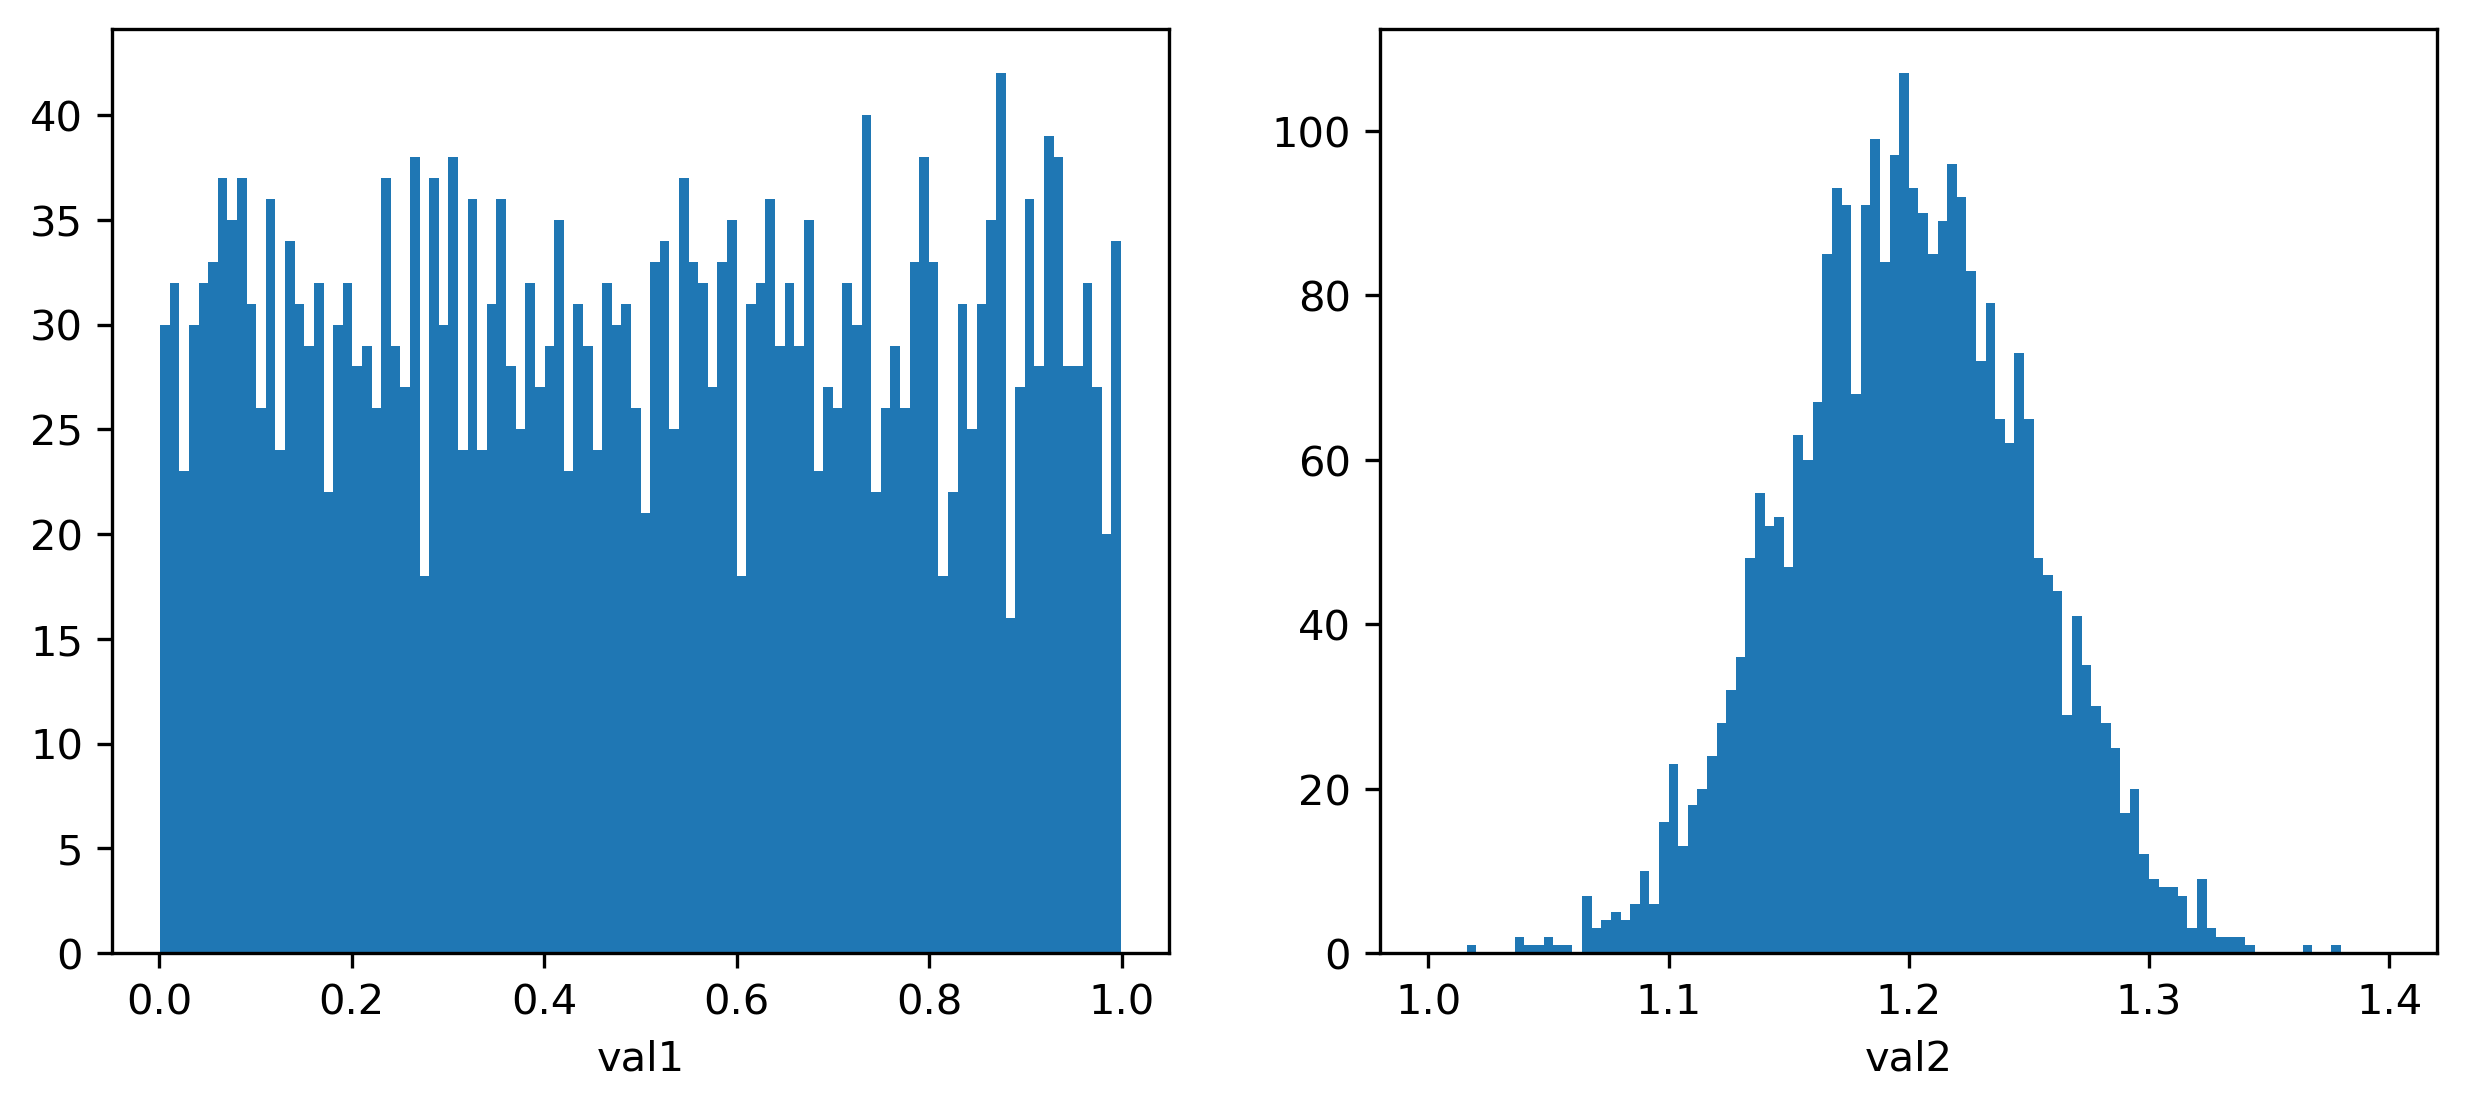

In [3]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), dpi=300)
bins1 = ax1.hist(val1, bins=100)
ax1.set_xlabel('val1')

bins2 = ax2.hist(val2, bins=100, range=(1.0,1.4))
ax2.set_xlabel('val2')
plt.show()

Looks like the first column is just a flat distribution between 0 and 1, while the second column is roughly Gaussian-distributed values.  We can fit to the histogram of the second column data to extract the mean and width (standard deviation) of the distriubtion.  First, we have to generate an array of bin centers and an array of bin occupancies of the histogram.  When we called `plt.hist()` above, the output was information about the bin edges and occupancies.  Let's check these out and then make another array of the values of the bin centers.

In [4]:
print(bins2[0])
print(bins2[1])
print(len(bins2[0]))
print(len(bins2[1]))

bin_occupancies = bins2[0]
bin_centers = []

for i in range(len(bin_occupancies)):
    bin_centers.append(0.5 * (bins2[1][i+0] + bins2[1][i+1]))
    
print(bin_centers)

[  0.   0.   0.   0.   1.   0.   0.   0.   0.   2.   1.   1.   2.   1.
   1.   0.   7.   3.   4.   5.   4.   6.  10.   6.  16.  23.  13.  18.
  20.  24.  28.  32.  36.  48.  56.  52.  53.  47.  63.  60.  67.  85.
  93.  91.  68.  91.  99.  84.  97. 107.  93.  90.  85.  89.  96.  92.
  83.  72.  79.  65.  62.  73.  65.  48.  46.  44.  29.  41.  35.  30.
  28.  25.  17.  20.  12.   9.   8.   8.   7.   3.   9.   3.   2.   2.
   2.   1.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.
   0.   0.]
[1.    1.004 1.008 1.012 1.016 1.02  1.024 1.028 1.032 1.036 1.04  1.044
 1.048 1.052 1.056 1.06  1.064 1.068 1.072 1.076 1.08  1.084 1.088 1.092
 1.096 1.1   1.104 1.108 1.112 1.116 1.12  1.124 1.128 1.132 1.136 1.14
 1.144 1.148 1.152 1.156 1.16  1.164 1.168 1.172 1.176 1.18  1.184 1.188
 1.192 1.196 1.2   1.204 1.208 1.212 1.216 1.22  1.224 1.228 1.232 1.236
 1.24  1.244 1.248 1.252 1.256 1.26  1.264 1.268 1.272 1.276 1.28  1.284
 1.288 1.292 1.296 1.3   1.304 1.308 1.312 1.316 1.32 

Now we can define the function that we want to fit to the data.  We'll go with a Gaussian because I happen to know that a Gaussian was used to generate this data.  Recall that a Gaussian has the form

\begin{equation}
  g(x) = A \exp\left( -\frac{(x-\mu)^2}{2\sigma^2}\right),
\end{equation}

where $\mu$ is the mean and $\sigma$ is the standard deviation of the distribution.

In [5]:
def gaussian(x, A, mu, sigma, ):
    return A*np.exp(-(x - mu)**2 / 2 / sigma**2)

And to fit this function to the data (*i.e.*, ask PytHon to find values of $A$, $\mu$ and $\sigma$ that make this function best describe the data), we import and use `curve_fit` from the `scipy.optimize` library:

In [6]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(gaussian, bin_centers, bin_occupancies, p0 = [500, 1.3, 0.1])

print(popt)
print(pcov)

ModuleNotFoundError: No module named 'scipy'

Let's check how good our fit is by plotting the optimal curve overlaid with the histogram!

In [ ]:
fcn_vals = gaussian(bin_centers, popt[0], popt[1], popt[2])

fig, ax = plt.subplots(figsize=(5,2), dpi=300)
ax.hist(val2, bins=100)
plt.xlabel('val2')
ax.plot(bin_centers,fcn_vals,"r-") # plot the predictions as a red line
plt.show()

Holy buckets, that's a good fit!  Recall that the outputs of the `curve_fit` function are two arrays -- the first is the optimal parameter values and the second is the covariance matrix.  It is up to you to remember how to use the covariance matrix to extract parameter uncertainties.  From this fit, we find that the distribution is described by a Gaussian with $\mu \approx 1.200$ and $\sigma \approx 5.04 \times 10^{-2}$.

***

## Analysis

**Now you!**

This short section was intended to remind you of some basic Python functionality.  The analysis that you will do below with CMS data is much more meaningful, but not all that much more sophisticated!  You'll use very few techniques that aren't used above.

A note on Pandas:  Some of you may be familiar with the Pandas Python library for parsing and manipulating tabular data.  It's great!  That said, don't use it for this analysis.  It's better to do calculations on an event-by-event basis.  If you've never used Pandas, ignore this paragraph :^)

### Di-electron analysis

You will now perform an analysis of the invariant mass spectrum of $10^5$ electron/positron (*i.e.*, *di-electron*) pairs recorded by the CMS collaboration in 2010.  (Important to note that this comprises a miniscule fraction of all of the data that CMS has collected.)  The data is in csv format in the file `CMS_dielectron.csv`.  Both this and the di-muon data below are provided by [CERN's Open Data initiative](https://opendata.cern.ch/).

A note on units: In these data files, energies are reported in GeV (giga-electron-volts) and momenta are reported in GeV/$c$.  Make sure that you are accounting for the factors of $c$ in your calculations.  (These odd units actually make the calculations quite easy.)

Each row in the file corresponds to an event.  The `E1,px1,py1,pz1` quantities are the energy and momentum components of particle 1 (electron) and `E2,px2,py2,pz2` are those for particle 2 (positron).  All other values in the file may be ignored.

Perform the following steps:
1. Read in the events in the file line-by-line.
1. For each event, calculate the following quantites.  Store these values in arrays or lists for plotting later. 
    - invariant mass squared of the electron and for the positron
    - total energy of the di-lepton pair
    - magnitude of momentum for the electron and for the position
    - magnitude of total momentum for the di-lepton pair
    - invariant mass of the electron/positron pair
1. Make histograms of $E_1$, $E_2$, $E_i$, $p_1$, $p_2$, $p_i$
1. Make histograms of $m_1$, $m_2$.  Are these in fact electrons/positrons?  Could they be any other stable particle?
1. Make a histogram of the di-lepton invariant mass, $m_i$.  Your histogram should show the invariant mass range from 0 to roughly 100 GeV, and should have roughly 300 bins.  A logarithmic $y$-axis will be helpful going forward.
1. In the invariant-mass distrubtion, you'll see several peaks!  These are particles that decayed into $e^+,e^-$ pairs!  WOW!  One of these peaks should be at $m_i\approx 90$~GeV.  Make another histogram of the invariant masses between 65 and 100 GeV.  Use the fitting approach above to extract the mean mass and width of this peak.  Your fit function should be a sum of the gaussian described above and a linear background function: $f(x) = g(x) + b_0 + b_1 x$.  Use this infomation and the PDG to identify the parent particle.  (Congrats, you just won a Nobel Prize.)
1. Identify the particles associated with at least two of the other peaks in the invariant-mass distribution.

**Important note on measurement precision and your calculations!** Keep in mind that the energy and momentum values in the CMS data files are *measured* quantities.  Though CMS is an amazing detector, these measurements are still affected by statistical and systematic errors.  This means that there may be events for which (*e.g.*) the measured energy is a bit lower than its actual value and the measured momentum is a bit higher than its actual value.  This could create events for which your calculated invariant mass squared is a negative number, and the resulting invariant mass is imaginary!  No, this doesn't break physics or mathematics!  It just means that these events can be omitted in the analysis, as their associated measurement error makes for an "unphysical" result.  Your analysis code can assign a zero value for any such unphysical quantities.

### Di-muon analysis

You will now apply the analysis that you built for the di-electron dataset to a dataset containing events with $\mu^-, \mu^+$ pairs (`MuRun2010B.csv`).  Nearly all of the code that you wrote above should be applicable to the di-muon dataset with minimal changes.

Repeat steps 1-6 from the previous section with the muon dataset.  After doing this, determine whether the di-muon invariant-mass distribution displays the same peaks as the di-electron distribution.  What similarities or differences exist?